In [17]:
import numpy as np
import networkx as nx
import pandas as pd
import csv
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 4
subSize=1000

In [18]:
graphs=[]
data = open('CSV/9_11_HIJACKERS_ASSOCIATES.csv', 'r')
csvfile = csv.reader(data, delimiter = '\t')
adj_mat = []
for row in csvfile:
    adj_mat.append(row)
data.close()
np_adj_mat = np.array(adj_mat[1:])
np_adj_mat = np_adj_mat[:, 1:].astype(int)
np_adj_mat = np_adj_mat[:15, :15]
graphs.append(nx.DiGraph(np_adj_mat))

unG = nx.read_edgelist("com-dblp.ungraph.txt", nodetype=int)
# subG=diG.subgraph(np.random.choice(x.nodes,size=subSize, replace=False))
# degrees=sorted(list(nx.degree(unG)),key=lambda x:x[1])
# subG=G.subgraph(np.random.choice(list([x[0] for x in degrees[-subSize*2:]]),size=subSize, replace=False))
subG=unG.subgraph([10816, 22531, 18373, 58183, 59273, 22955, 15821, 71407, 117331, 56565, 21946, 34140, 3])
graphs.append(subG)

diG=nx.read_weighted_edgelist("higgs-mention_network.edgelist",create_using=nx.DiGraph(),nodetype=int)
# degrees=sorted(list(nx.degree(diG)),key=lambda x:x[1])
# subG=diG.subgraph(np.random.choice(list([x[0] for x in degrees[-subSize*2:]]),size=subSize, replace=False))
# x=nx.bfs_tree(diG,88) 
# subG=diG.subgraph(np.random.choice(x.nodes,size=subSize, replace=False))
keys = list(nx.shortest_path(diG, 105639).keys())
keys2 = list(nx.shortest_path(diG, 9903).keys())[:5]
# print keys, keys2
subG = nx.subgraph(diG, keys[0:5] + keys2[:2])
graphs.append(subG)

nodes=[g.number_of_nodes() for g in graphs]

In [19]:
nodes

[15, 13, 7]

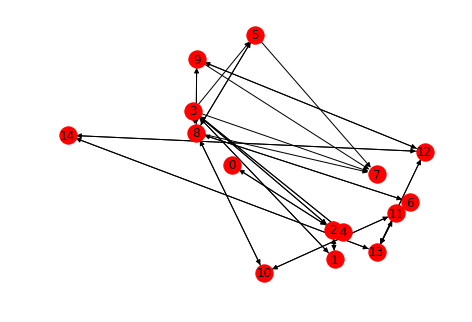

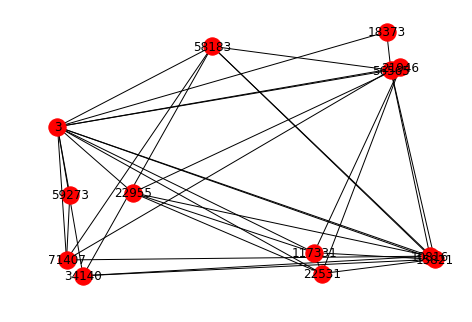

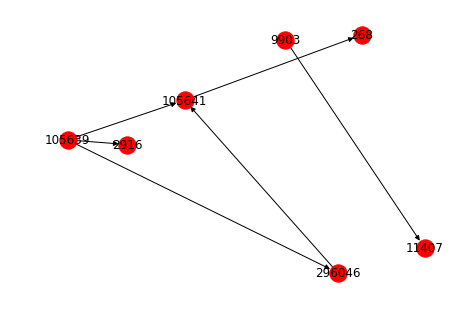

In [20]:
for g,N in zip(graphs,nodes):
    if(N<150):
        nx.draw_random(g,with_labels=True)
        plt.show()

In [12]:
def getDegrees(G):
    # sum of in and out degrees by default. use in_degree for specific
    return list(nx.degree(G))

def compareDirect(a,b,size=10,name=""):        
#     print("Calculated :\t",a[:size],"...")
#     print("")
#     print("Expected :\t",b[:size],"...")    
#     print("")
    diffs=[ abs(a-b) for a,b in zip(a,b)]
#     print("Absolute Diffs: ",diffs[:size],"..." if size<len(a) else "")
#     print("")
    print("Sum of absolute diffs: ",sum(diffs))
#     ratios=[ a/b if b else '0' for a,b in zip(a,b)]
#     print("Ratios: ",ratios)
    if(name!=""):
        a=sorted(a,reverse=True)
        b=sorted(b,reverse=True)
        pd.DataFrame(a).to_csv(name+"_a.csv",header=False,index=None)
        pd.DataFrame(b).to_csv(name+"_b.csv",header=False,index=None)
        
    print(stats.spearmanr(a,b))
    print("")
    
    
    
def compare(a,b,name,size=10):
    print("Comparision Title: "+name)
    a=sorted(a,key=lambda x:x[1],reverse=True)
    b=sorted(b,key=lambda x:x[1],reverse=True)
    
    pd.DataFrame(a).to_csv(name+"_a.csv",header=False,index=None)
    pd.DataFrame(b).to_csv(name+"_b.csv",header=False,index=None)
    
    a=[x[1] for x in a]
    b=[x[1] for x in b]
    compareDirect(a,b,size)
    

In [15]:
def degree(G,weighted=None):
    return nx.degree_centrality(G)
def closeness(G,weighted):
    return nx.closeness_centrality(G,distance='weight') if weighted else nx.closeness_centrality(G);
def betweenness(G,weighted):
    return nx.betweenness_centrality(G,weight='weight') if weighted else nx.betweenness_centrality(G);
def eigenvector(G,weighted):
    return nx.eigenvector_centrality(G,weight='weight') if weighted else nx.eigenvector_centrality(G);
def clustering(G,weighted=None):
    return nx.clustering(G,weight='weight')

centr_funcs=[degree,closeness]#,betweenness]#,eigenvector,clustering]
func_pairs=[]
for i in range(0,len(centr_funcs)):
    for j in range(i+1,len(centr_funcs)):
        func_pairs.append((centr_funcs[i],centr_funcs[j]))


In [16]:
names=["911","dblp","twitter"]
weighted=[0,0,1]
for i in range(0,3):    
    g=graphs[i]
    for f1,f2 in func_pairs:
        cmp1=list(f1(g,weighted=weighted[i]).items())
        cmp2=list(f2(g,weighted=weighted[i]).items())
        print(cmp1)
        print(cmp2)
        compare(cmp1,cmp2,name=names[i]+"_cmp_"+f1.__name__+"_"+f2.__name__)


[(0, 0.14285714285714285), (1, 0.2857142857142857), (2, 0.42857142857142855), (3, 0.6428571428571428), (4, 0.14285714285714285), (5, 0.2857142857142857), (6, 0.14285714285714285), (7, 0.2857142857142857), (8, 0.7142857142857142), (9, 0.3571428571428571), (10, 0.2857142857142857), (11, 0.2857142857142857), (12, 0.42857142857142855), (13, 0.42857142857142855), (14, 0.2857142857142857)]
[(0, 0.14285714285714285), (1, 0.19047619047619047), (2, 0.22857142857142856), (3, 0.22857142857142856), (4, 0.14285714285714285), (5, 0.3894009216589862), (6, 0.33531746031746035), (7, 0.5), (8, 0.5029761904761905), (9, 0.4023809523809524), (10, 0.3894009216589862), (11, 0.32625482625482627), (12, 0.33531746031746035), (13, 0.2807308970099668), (14, 0.26825396825396824)]
Comparision Title: 911_cmp_degree_closeness
Sum of absolute diffs:  0.7550157367205377
SpearmanrResult(correlation=0.9577623937391776, pvalue=2.0714537326048414e-08)

[(10816, 0.5), (22531, 0.41666666666666663), (3, 1.0), (18373, 0.166666